This ipynb file will have my observation related to convergence analysis
The data will however be pre determined 

In [3]:
#imports and setting seed 
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

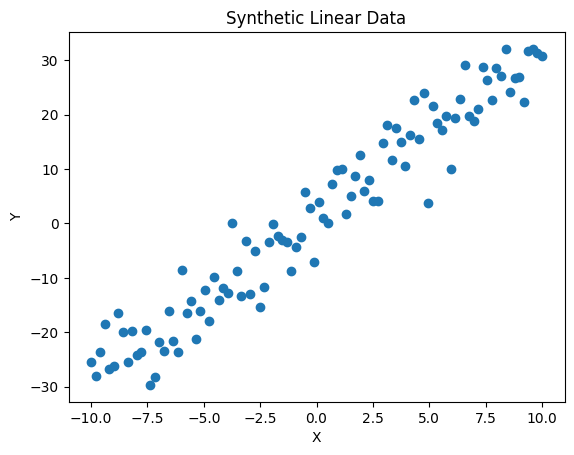

In [4]:
#generating fake data 
def generate_linear_data(n=100, m=3, c=2, noise_std=5):
    X = np.linspace(-10, 10, n)
    noise = np.random.normal(0, noise_std, size=n)
    Y = m * X + c + noise
    X_design = np.column_stack((np.ones(n), X))
    return X_design, Y, m, c

X, Y, m_true, c_true = generate_linear_data()

plt.scatter(X[:,1], Y)
plt.title("Synthetic Linear Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [5]:
#loss function
def loss(X, Y, w):
    n = len(Y)
    error = X @ w - Y
    return (1/n) * np.dot(error, error)


In [6]:
#gradient function
def gradient(X, Y, w):
    n = len(Y)
    return (2/n) * X.T @ (X @ w - Y)


In [7]:
#running GD
def gradient_descent(X, Y, lr=0.01, iterations=100):
    w = np.zeros(X.shape[1])
    
    loss_history = []
    weight_history = []
    
    for i in range(iterations):
        grad = gradient(X, Y, w)
        w = w - lr * grad
        
        loss_history.append(loss(X, Y, w))
        weight_history.append(w.copy())
        
    return w, loss_history, weight_history


In [8]:
#running program
learning_rate = 0.01
iterations = 200

w_final, loss_history, weight_history = gradient_descent(X, Y, learning_rate, iterations)

print("True parameters:")
print("c =", c_true, "m =", m_true)

print("\nEstimated parameters:")
print("c =", w_final[0], "m =", w_final[1])


True parameters:
c = 2 m = 3

Estimated parameters:
c = 1.4547237548336756 m = 3.0344831683416413


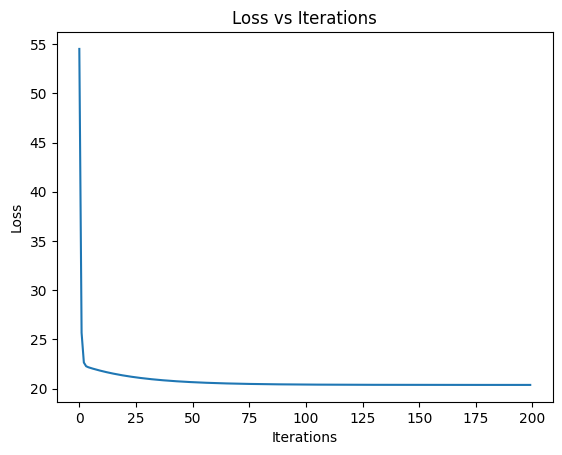

In [9]:
#plots 
plt.plot(loss_history)
plt.title("Loss vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()


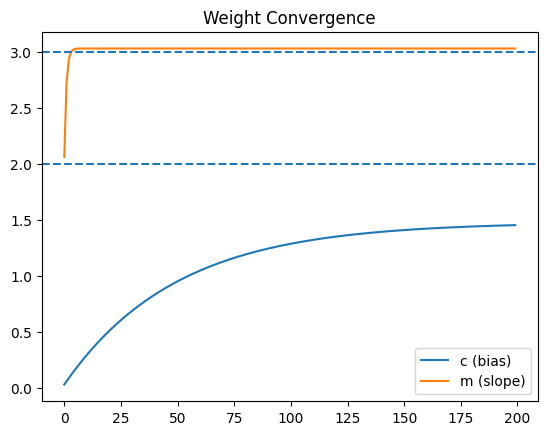

In [10]:
#weights convergence 
weight_history = np.array(weight_history)

plt.plot(weight_history[:,0], label="c (bias)")
plt.plot(weight_history[:,1], label="m (slope)")
plt.axhline(c_true, linestyle="--")
plt.axhline(m_true, linestyle="--")
plt.legend()
plt.title("Weight Convergence")
plt.show()


C:\Users\dheem\AppData\Local\Temp\ipykernel_17016\4075271524.py:5: RuntimeWarning: overflow encountered in dot
  return (1/n) * np.dot(error, error)


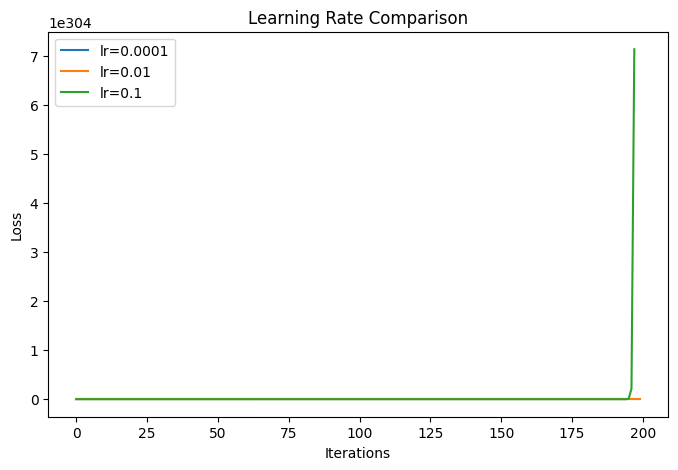

In [11]:
#LR comparioson
learning_rates = [0.0001, 0.01, 0.1]

plt.figure(figsize=(8,5))

for lr in learning_rates:
    _, loss_hist, _ = gradient_descent(X, Y, lr, 200)
    plt.plot(loss_hist, label=f"lr={lr}")

plt.title("Learning Rate Comparison")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()
